In [4]:
!pip install kaggle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 208MB/s]
100% 1.06G/1.06G [00:10<00:00, 111MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.3133 - accuracy: 0.5817 - val_loss: 0.6585 - val_accuracy: 0.6528
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5747 - accuracy: 0.7011 - val_loss: 0.7075 - val_accuracy: 0.6798
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4888 - accuracy: 0.7696 - val_loss: 0.5322 - val_accuracy: 0.7400
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4197 - accuracy: 0.8108 - val_loss: 0.4673 - val_accuracy: 0.7784
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3675 - accuracy: 0.8393 - val_loss: 0.4544 - val_accuracy: 0.7900
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2869 - accuracy: 0.8791 - val_loss: 0.6725 - val_accuracy: 0.7748
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2097 - accuracy: 0.9119 - val_loss: 0.5002 - val_ac

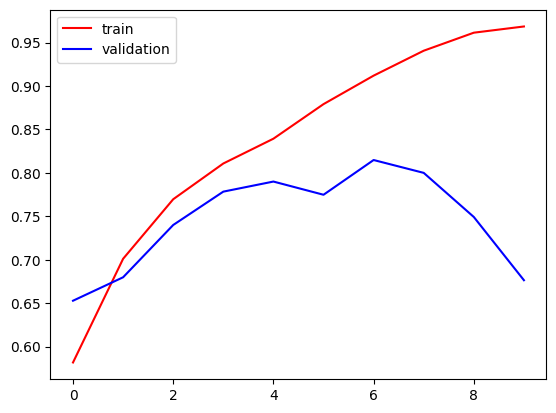

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

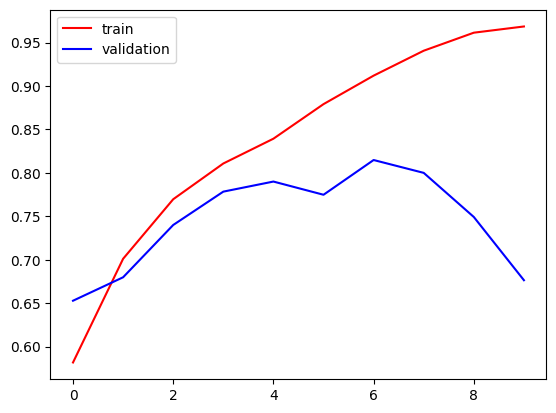

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

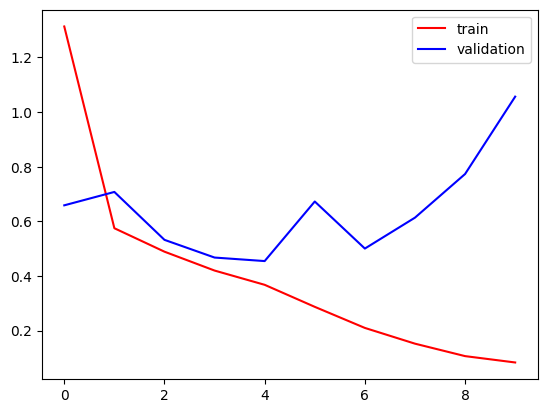

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

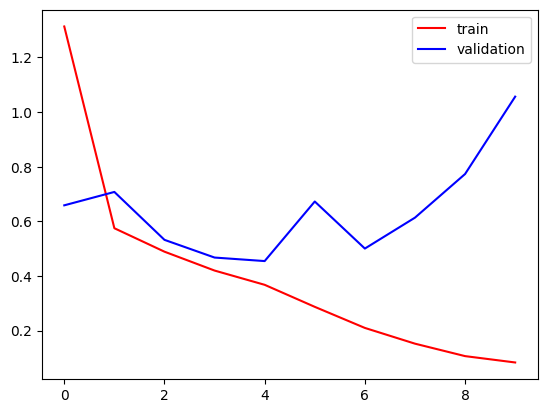

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/cat.jpg')

In [31]:
from PIL import Image
import numpy as np

In [32]:
image_path = "/content/test/cats/cat.10026.jpg"
img = Image.open(image_path)

In [33]:
img_array = np.array(img, dtype=np.float32)

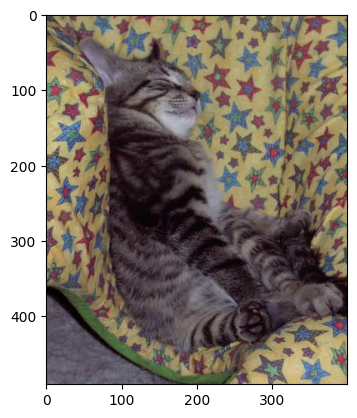

In [36]:
plt.imshow(img)

In [42]:
import cv2
from PIL import Image
import numpy as np



In [48]:
import cv2
from PIL import Image
import numpy as np

# Load and preprocess the image
image_path = "/content/test/dogs/dog.10032.jpg"
img = Image.open(image_path)
img_array = np.array(img, dtype=np.float32)

# Resize the image to match the expected input shape of your model
img_array = cv2.resize(img_array, (256, 256))
img_array = img_array / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(img_array)

# Interpret the results
if predictions[0, 0] < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

1/1 [==============================] - 0s 38ms/step
It's a dog!
